In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets
from utils1 import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from utils1 import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

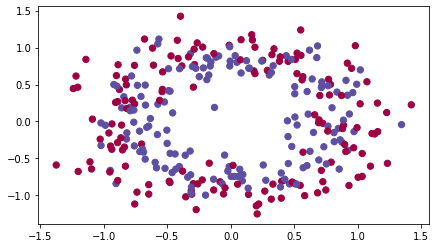

In [98]:
train_X, train_Y = load_dataset()

In [99]:


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):

    
    np.random.seed(seed)            
    m = X.shape[1]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, int(m/mini_batch_size)*mini_batch_size : ]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [100]:
def initialize_adam(parameters) :    
    L = len(parameters) // 2 
    v = {}
    s = {}
    for l in range(L):
    
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
    
    return v, s

In [101]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8): 
    L = len(parameters) // 2                
    v_corrected = {}                         
    s_corrected = {}                         
      
    for l in range(L):
        v["dW" + str(l+1)] = beta1*v["dW" + str(l+1)] + (1 - beta1)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1*v["db" + str(l+1)] + (1 - beta1)*grads['db' + str(l+1)]
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1 - beta1**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1 - beta1**t)
        s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)] + (1 - beta2)*np.square(grads['dW' + str(l+1)])
        s["db" + str(l+1)] = beta2*s["db" + str(l+1)] + (1 - beta2)*np.square(grads['db' + str(l+1)])
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1 - beta2**t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1 - beta2**t)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)])+epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)])+epsilon)
    return parameters, v, s

In [102]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0009, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):

    L = len(layers_dims)             
    costs = []                       
    t = 0                            
    seed = 10                         
    m = X.shape[1]                   
    print("\nThe number of training examples is : %i\n" %m)
    print("The mini-batch size : %i\n" %mini_batch_size)
    parameters = initialize_parameters(layers_dims)
    v, s = initialize_adam(parameters)
    
   
    for i in range(num_epochs):
        
        
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            (minibatch_X, minibatch_Y) = minibatch
            a3, caches = forward_propagation(minibatch_X, parameters)

            cost_total += compute_cost(a3, minibatch_Y)

            grads = backward_propagation(minibatch_X, minibatch_Y, caches)
            t = t + 1
            parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
            
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 500)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters


The number of training examples is : 300

The mini-batch size : 64

Cost after epoch 0: 0.013151
Cost after epoch 1000: 0.008959
Cost after epoch 2000: 0.008565
Cost after epoch 3000: 0.008377
Cost after epoch 4000: 0.008231
Cost after epoch 5000: 0.008199
Cost after epoch 6000: 0.008125
Cost after epoch 7000: 0.007973
Cost after epoch 8000: 0.008072
Cost after epoch 9000: 0.007886


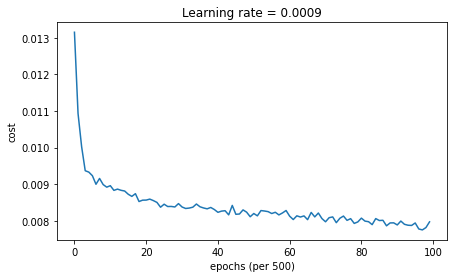

Accuracy: 0.76


In [103]:
layers_dims = [train_X.shape[0], 12, 8, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")
predictions = predict(train_X, train_Y, parameters)



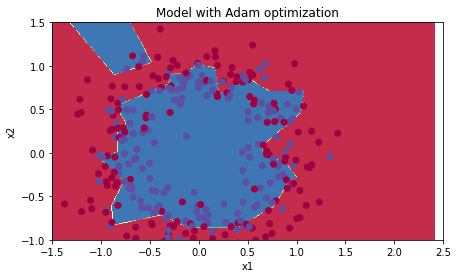

In [104]:
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)